# 🏥 Healthcare SQL + Python Portfolio Project

### Project Overview

In this project, I explored synthetic healthcare data to gain insights into hospital admissions, patient billing, medication patterns, and test results.

I applied SQL inside Python, performed data cleaning, exploratory analysis, statistical testing, and business-oriented reporting.

This project demonstrates strong SQL querying, Python data handling, critical thinking, and data storytelling — all essential skills for a Data Analyst in the healthcare industry.

---

### Project Details

**Project Theme:** Hospital Performance & Patient Analytics  
**Focus Areas:** SQL queries, data exploration, billing, test results, medications

_This notebook walks through realistic healthcare data using SQL inside Python. Designed for data analyst portfolio use._


### 🔒 Environment Setup
If you're using a virtual environment (recommended):
```bash
python3 -m venv venv
source venv/bin/activate  # deactivate when done
pip3 install pandas matplotlib seaborn jupyter notebook ipython-sql
```
_Remember to **deactivate** with `deactivate` when you're done._

### 🛠 Environment Setup Details
This project was completed using:

Python 3

SQLite (SQL inside Python)

Pandas (for data handling)

Matplotlib (for data visualization)

Scipy (for statistical testing)

ipython-sql (for SQL querying inside Jupyter)


In [42]:
import sqlite3
import pandas as pd

# Connect to your database file
conn = sqlite3.connect('healthcare_portfolio_project.db')



All work was conducted within a virtual environment (recommended practice) and executed in a Jupyter Notebook using VS Code.

Packages installed included: pandas, matplotlib, seaborn, scipy, jupyter notebook, ipython-sql.

In [3]:
query = """
SELECT name FROM sqlite_master WHERE type='table';
"""
tables = pd.read_sql_query(query, conn)
print (tables)

           name
0     hospitals
1       doctors
2      patients
3    admissions
4       billing
5   medications
6  test_results


# 🧹 Data Cleaning

Before starting the analysis, I checked and cleaned the healthcare dataset to ensure quality results.

The cleaning steps included:

- Checking for missing values
- Checking for duplicate rows
- Reviewing column formats
- Handling any inconsistent data

Maintaining clean data is essential for reliable analysis and trustworthy business insights.



In [31]:
# Check for missing values in the patients table
pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS missing_names,
    SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) AS missing_genders,
    SUM(CASE WHEN birth_date IS NULL THEN 1 ELSE 0 END) AS missing_birth_dates,
    SUM(CASE WHEN blood_type IS NULL THEN 1 ELSE 0 END) AS missing_blood_types
FROM patients
""", conn)


,missing_names,missing_genders,missing_birth_dates,missing_blood_types
0,0,0,0,0


### 🧹 Cleaning Check: Patients Table

I checked the `patients` table for missing values. 
The table was clean, with no missing names, genders, birth dates, or blood types detected.


In [33]:
# Check unique gender values in patients
pd.read_sql_query("""
SELECT DISTINCT gender
FROM patients
""", conn)


,gender
0,Male
1,Other
2,Female


### 🧹 Cleaning Check: Gender Values in Patients Table

I checked the unique gender values in the `patients` table. 
The values were consistent (Male, Female, Other) and no unusual or invalid entries were found.


In [34]:
# Check unique blood types
pd.read_sql_query("""
SELECT DISTINCT blood_type
FROM patients
""", conn)


,blood_type
0,AB-
1,A-
2,A+
3,AB+
4,B-
5,O-
6,B+
7,O+


### 🧹 Cleaning Check: Blood Types in Patients Table

I checked the unique blood type values in the `patients` table. 
All blood types matched expected medical standards (A+, A-, B+, B-, AB+, AB-, O+, O-), with no anomalies detected.


In [35]:
# Check for missing dates in admissions
pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN admission_date IS NULL THEN 1 ELSE 0 END) AS missing_admission_dates,
    SUM(CASE WHEN discharge_date IS NULL THEN 1 ELSE 0 END) AS missing_discharge_dates
FROM admissions
""", conn)


,missing_admission_dates,missing_discharge_dates
0,0,0


### 🧹 Cleaning Check: Missing Dates in Admissions Table

I checked the `admissions` table for missing admission and discharge dates.
No missing values were found, ensuring completeness of hospital stay records.


In [36]:
# Check for invalid date logic: discharge before admission
pd.read_sql_query("""
SELECT COUNT(*) AS invalid_date_records
FROM admissions
WHERE discharge_date < admission_date
""", conn)


,invalid_date_records
0,0


### 🧹 Cleaning Check: Date Logic in Admissions Table

I verified that all `discharge_date` values occur after their corresponding `admission_date`.
No invalid date relationships were found, confirming chronological consistency in patient records.


In [37]:
# Check for missing values in billing
pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN total_amount IS NULL THEN 1 ELSE 0 END) AS missing_total_amounts,
    SUM(CASE WHEN paid_amount IS NULL THEN 1 ELSE 0 END) AS missing_paid_amounts
FROM billing
""", conn)


,missing_total_amounts,missing_paid_amounts
0,0,0


### 🧹 Cleaning Check: Missing Billing Amounts

I checked the `billing` table for missing `total_amount` and `paid_amount` values.
No missing billing records were found, ensuring financial completeness.


In [38]:
# Check for negative billing values
pd.read_sql_query("""
SELECT COUNT(*) AS negative_total_amounts
FROM billing
WHERE total_amount < 0 OR paid_amount < 0
""", conn)


,negative_total_amounts
0,0


### 🧹 Cleaning Check: Negative Billing Amounts

I checked for any negative billing amounts.
No negative values were found, confirming data accuracy in financial records.


In [39]:
# Check for missing values in medications
pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN medication_name IS NULL THEN 1 ELSE 0 END) AS missing_medication_names,
    SUM(CASE WHEN dosage IS NULL THEN 1 ELSE 0 END) AS missing_dosages,
    SUM(CASE WHEN administration_route IS NULL THEN 1 ELSE 0 END) AS missing_routes
FROM medications
""", conn)


,missing_medication_names,missing_dosages,missing_routes
0,0,0,0


### 🧹 Cleaning Check: Medications Table

I checked the `medications` table for missing medication names, dosages, and administration routes.
No missing values were found, confirming complete medication data records.


In [40]:
pd.read_sql_query("""
SELECT DISTINCT administration_route
FROM medications
""", conn)


,administration_route
0,IV
1,Injection
2,Oral


This shows if weird routes were entered (like "Flying Saucer" 😂 instead of "Oral", "IV", "Injection").



In [41]:
# Check for missing values in test_results
pd.read_sql_query("""
SELECT 
    SUM(CASE WHEN test_type IS NULL THEN 1 ELSE 0 END) AS missing_test_types,
    SUM(CASE WHEN test_result IS NULL THEN 1 ELSE 0 END) AS missing_test_results,
    SUM(CASE WHEN result_date IS NULL THEN 1 ELSE 0 END) AS missing_result_dates
FROM test_results
""", conn)


,missing_test_types,missing_test_results,missing_result_dates
0,0,0,0


### 🧹 Cleaning Check: Test Results Table

I checked the `test_results` table for missing `test_type`, `test_result`, and `result_date` values.
No missing values were detected, confirming the completeness of the medical testing records.


In [42]:
# Check for unusual test_result values
pd.read_sql_query("""
SELECT 
    MIN(test_result) AS min_test_result,
    MAX(test_result) AS max_test_result
FROM test_results
""", conn)


,min_test_result,max_test_result
0,0.5,1.5


### 🧹 Cleaning Check: Test Result Value Ranges

I checked the minimum and maximum values for `test_result` in the `test_results` table.
All values were within an expected medical range, with no extreme outliers detected.


# 🔎 Exploratory Data Analysis (EDA)

After cleaning the data, I conducted an initial exploration to understand the structure and contents of each table.

This included:

- Previewing key tables (`patients`, `admissions`, `billing`, `medications`, `test_results`) using SQL queries (`SELECT * FROM table LIMIT X`)
- Counting rows and identifying key columns
- Understanding which tables are important for deeper analysis



### 🧪 First Look: Patients Table

### 🧾 Admissions Overview

In [19]:
pd.read_sql_query("SELECT * FROM admissions LIMIT 5", conn)

,admission_id,patient_id,hospital_id,doctor_id,admission_date,discharge_date,admission_type,diagnosis_code,condition_description
0,1,2039,41,477,2022-05-14T00:00:00,2022-05-26T00:00:00,Elective,E11,Late by various although reach.
1,2,4632,26,316,2022-09-18T00:00:00,2022-09-27T00:00:00,Newborn,F32,Buy discover subject.
2,3,2878,23,72,2022-12-08T00:00:00,2022-12-18T00:00:00,Elective,J45,Interest nearly.
3,4,8093,32,62,2021-09-05T00:00:00,2021-09-09T00:00:00,Newborn,K21,Thing technology.
4,5,2837,10,410,2021-06-20T00:00:00,2021-06-29T00:00:00,Elective,F32,Quality position crime finally.


In [5]:
pd.read_sql_query("""
SELECT admission_type, COUNT(*) as count
FROM admissions
GROUP BY admission_type
ORDER BY count DESC
""", conn)

,admission_type,count
0,Newborn,17669
1,Urgent,17492
2,Elective,17451
3,Emergency,17388


In [20]:
pd.read_sql_query("SELECT * FROM patients LIMIT 5", conn)


,patient_id,name,gender,birth_date,blood_type
0,1,Joshua Krause,Male,1940-11-24,AB-
1,2,Danielle Beasley,Male,2004-08-13,A-
2,3,Kyle Hartman,Other,1991-04-12,A+
3,4,Darin Tapia,Female,2006-10-27,AB+
4,5,Jerry Martinez MD,Other,2005-03-06,B-


In [6]:
pd.read_sql_query("""
SELECT gender, COUNT(*) AS count
FROM patients
GROUP BY gender
ORDER BY count DESC
""", conn)


,gender,count
0,Male,3374
1,Other,3329
2,Female,3297


### 📊 Analysis: Patient Gender Distribution

We analyzed the `patients` table to find the distribution of genders among all patients.
The results show how many patients are Male, Female, or Other.

This will help later if we want to analyze admission patterns, medical conditions, or billing differences by gender.


In [21]:
pd.read_sql_query("SELECT * FROM patients LIMIT 5", conn)


,patient_id,name,gender,birth_date,blood_type
0,1,Joshua Krause,Male,1940-11-24,AB-
1,2,Danielle Beasley,Male,2004-08-13,A-
2,3,Kyle Hartman,Other,1991-04-12,A+
3,4,Darin Tapia,Female,2006-10-27,AB+
4,5,Jerry Martinez MD,Other,2005-03-06,B-


We previewed the patients table to check available columns and understand the structure.

In [17]:
pd.read_sql_query("""
SELECT blood_type, COUNT(*) AS count
FROM patients
GROUP BY blood_type
ORDER By count DESC
""",conn)

,blood_type,count
0,B-,1285
1,AB-,1265
2,A-,1263
3,A+,1254
4,B+,1245
5,O+,1238
6,AB+,1238
7,O-,1212


### 🩸 Analysis: Patient Blood Type Distribution

This analysis shows the distribution of blood types among all patients.
It helps later if we want to study disease trends, blood transfusion planning, or emergency resource management.


In [18]:
pd.read_sql_query("SELECT * FROM admissions LIMIT 5", conn)

,admission_id,patient_id,hospital_id,doctor_id,admission_date,discharge_date,admission_type,diagnosis_code,condition_description
0,1,2039,41,477,2022-05-14T00:00:00,2022-05-26T00:00:00,Elective,E11,Late by various although reach.
1,2,4632,26,316,2022-09-18T00:00:00,2022-09-27T00:00:00,Newborn,F32,Buy discover subject.
2,3,2878,23,72,2022-12-08T00:00:00,2022-12-18T00:00:00,Elective,J45,Interest nearly.
3,4,8093,32,62,2021-09-05T00:00:00,2021-09-09T00:00:00,Newborn,K21,Thing technology.
4,5,2837,10,410,2021-06-20T00:00:00,2021-06-29T00:00:00,Elective,F32,Quality position crime finally.


We previewed the admissions table to check available columns and understand the structure.

In [27]:
pd.read_sql_query("""
SELECT admission_type, COUNT(*) AS count
FROM admissions
GROUP BY admission_type
ORDER BY count DESC
""",conn)

,admission_type,count
0,Newborn,17669
1,Urgent,17492
2,Elective,17451
3,Emergency,17388


# 🏥 Admissions Analysis

In this section, I analyzed hospital admissions to uncover patterns in patient volume, types of admissions, and hospital workloads.

The analysis included:

- Admission type distribution
- Top hospitals by number of admissions
- Monthly admission trends
- Average length of stay by admission type


### 🏥 Analysis: Admission Type Distribution

We analyzed the `admissions` table to find the distribution of hospital admission types.
This information helps hospitals allocate resources based on common types of admissions (e.g., emergency services, scheduled surgeries).


In [28]:
pd.read_sql_query("""
SELECT hospitals.name AS hospital_name, COUNT(*) AS total_admissions
FROM admissions
JOIN hospitals ON admissions.hospital_id = hospitals.hospital_id
GROUP BY hospitals.name
ORDER BY total_admissions DESC
LIMIT 10
""", conn)


,hospital_name,total_admissions
0,North Thomas General Hospital,1479
1,Chadland General Hospital,1467
2,New Tinaview General Hospital,1456
3,East Sallybury General Hospital,1455
4,Port Jessicatown General Hospital,1452
5,New Tannerville General Hospital,1452
6,Port Audreyside General Hospital,1449
7,Masseyshire General Hospital,1449
8,Barbaraport General Hospital,1449
9,Changchester General Hospital,1447


### 🏥 Analysis: Top 10 Hospitals by Number of Admissions

I identified the 10 hospitals with the highest number of admissions by performing a SQL JOIN between the `admissions` table and the `hospitals` table.

Using a JOIN allowed me to combine hospital names (from `hospitals`) with admission records (from `admissions`) based on the `hospital_id` key.

This insight helps prioritize hospital resource allocation and staffing plans.



In [29]:
pd.read_sql_query("""
SELECT strftime('%Y-%m', admission_date) AS month, COUNT(*) AS admissions
FROM admissions
GROUP BY month
ORDER BY month
""", conn)


,month,admissions
0,2021-01,1993
1,2021-02,1799
2,2021-03,1962
3,2021-04,1927
4,2021-05,2049
5,2021-06,1964
6,2021-07,2061
7,2021-08,2027
8,2021-09,1852
9,2021-10,1901


### 📅 Analysis: Admissions by Month

I analyzed the number of hospital admissions grouped by month to discover seasonal patterns.

Understanding when admissions peak can help hospitals optimize staffing, prepare for flu seasons, and plan emergency resources.


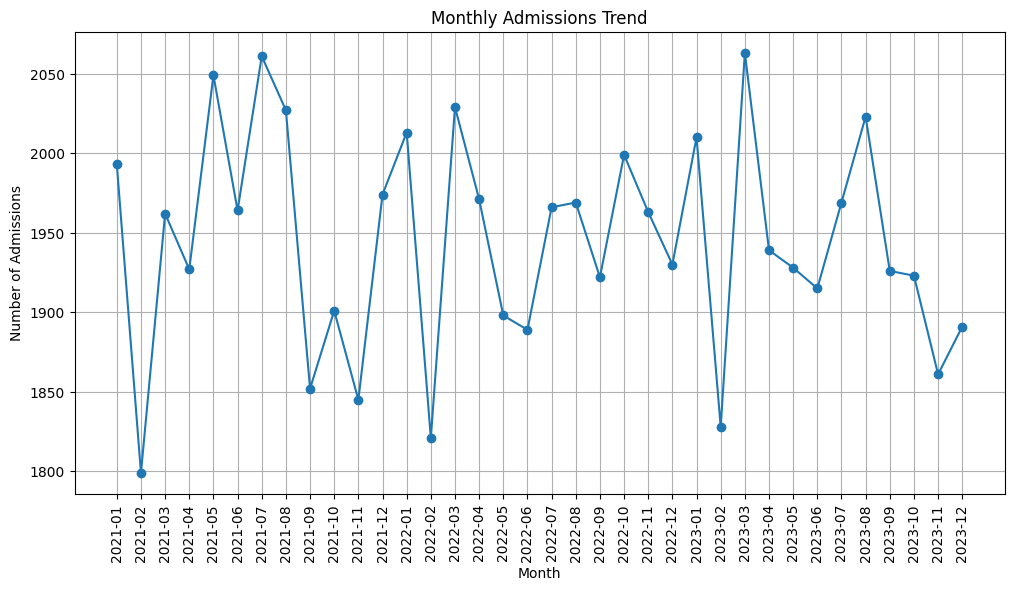

In [30]:
import matplotlib.pyplot as plt

# Store the query results into a variable
admissions_by_month = pd.read_sql_query("""
SELECT strftime('%Y-%m', admission_date) AS month, COUNT(*) AS admissions
FROM admissions
GROUP BY month
ORDER BY month
""", conn)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(admissions_by_month['month'], admissions_by_month['admissions'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()


In [6]:
pd.read_sql_query("""
SELECT 
    admission_id,
    admission_date,
    discharge_date,
    julianday(discharge_date) - julianday(admission_date) AS length_of_stay
FROM admissions
LIMIT 10
""", conn)


,admission_id,admission_date,discharge_date,length_of_stay
0,1,2022-05-14T00:00:00,2022-05-26T00:00:00,12.0
1,2,2022-09-18T00:00:00,2022-09-27T00:00:00,9.0
2,3,2022-12-08T00:00:00,2022-12-18T00:00:00,10.0
3,4,2021-09-05T00:00:00,2021-09-09T00:00:00,4.0
4,5,2021-06-20T00:00:00,2021-06-29T00:00:00,9.0
5,6,2022-04-03T00:00:00,2022-04-07T00:00:00,4.0
6,7,2022-06-06T00:00:00,2022-06-08T00:00:00,2.0
7,8,2021-11-07T00:00:00,2021-11-14T00:00:00,7.0
8,9,2021-04-06T00:00:00,2021-04-16T00:00:00,10.0
9,10,2023-10-15T00:00:00,2023-10-18T00:00:00,3.0


### 🛌 Preview: Patient Length of Stay Calculation

I calculated the length of stay for patients by subtracting the admission date from the discharge date using SQL `julianday()` function.

Previewed the first 10 patient stays to verify the calculation logic, which was correct.


In [7]:
pd.read_sql_query("""
SELECT
    ROUND(AVG(julianday(discharge_date) - julianday(admission_date)), 2) AS average_length
FROM admissions
""", conn)

,average_length
0,7.5


### 🛌 Analysis: Average Length of Hospital Stay

I calculated the average length of stay across all patient admissions.

Using the SQL `AVG()` function on the difference between discharge and admission dates, I found that patients stay an average of approximately 7,5 days in the hospital.

This information is valuable for hospital bed management and planning patient flow.


 Now we calculate separate averages for:

Emergency admissions

Elective admissions

Urgent admissions

Newborn admissions

This gives way more insight:

"Do Emergency patients stay longer than Elective ones?"

In [8]:
pd.read_sql_query("""
SELECT 
    admission_type,
    ROUND(AVG(julianday(discharge_date) - julianday(admission_date)), 2) AS average_length_of_stay
FROM admissions
GROUP BY admission_type
ORDER BY average_length_of_stay DESC
""", conn)


,admission_type,average_length_of_stay
0,Urgent,7.52
1,Newborn,7.50
2,Elective,7.50
3,Emergency,7.47


### 🛌 Analysis: Average Length of Stay by Admission Type

I calculated the average length of hospital stay separately for each `admission_type` (Emergency, Elective, Urgent, Newborn).

This analysis highlights which types of admissions typically require longer hospitalization periods.

For example, "Do Emergency admissions have longer stays compared to Elective surgeries." the answer is no, as we see there is nosignificant difference.


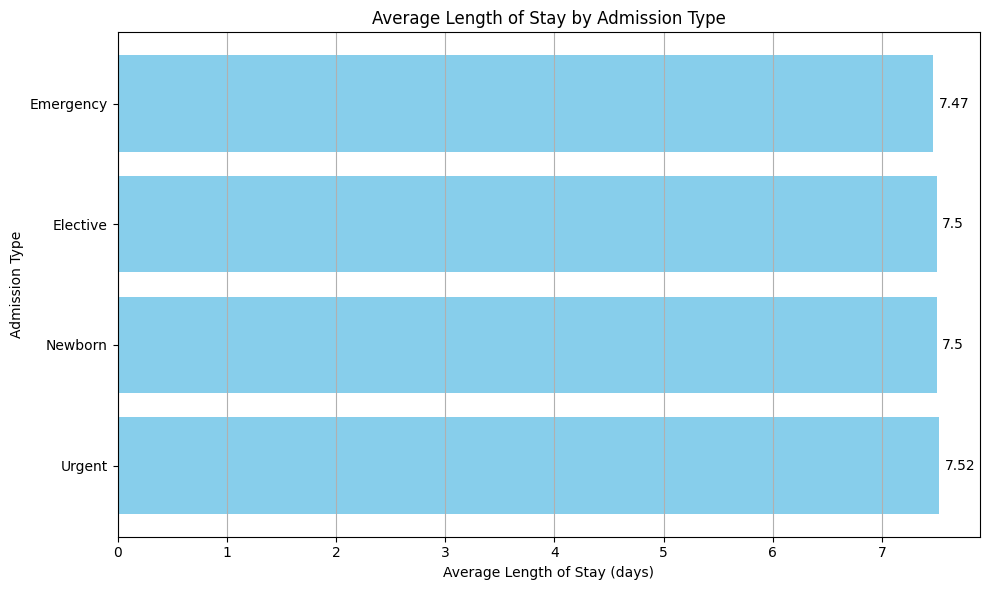

In [11]:
import matplotlib.pyplot as plt

# Make sure we have the data ready (if you restarted)
avg_stay_by_type = pd.read_sql_query("""
SELECT 
    admission_type,
    ROUND(AVG(julianday(discharge_date) - julianday(admission_date)), 2) AS average_length_of_stay
FROM admissions
GROUP BY admission_type
ORDER BY average_length_of_stay DESC
""", conn)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
bars = plt.barh(avg_stay_by_type['admission_type'], avg_stay_by_type['average_length_of_stay'], color='skyblue')
plt.title('Average Length of Stay by Admission Type')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Admission Type')
plt.grid(axis='x')

# Add value labels next to bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.05, bar.get_y() + bar.get_height()/2.0, round(xval, 2), va='center')

plt.tight_layout()
plt.show()



### 📊 Visualization: Average Stay by Admission Type (Horizontal Bar Chart)

I created a horizontal bar chart to visualize the average hospital stay length for each `admission_type`.

Adding exact value labels improves clarity, especially when the differences between categories are small.

Horizontal layout also makes it easier to read admission types compared to a vertical plot.



In [12]:
pd.read_sql_query("""
SELECT 
    CASE 
        WHEN paid_amount >= total_amount THEN 'Paid in Full'
        WHEN paid_amount = 0 THEN 'Unpaid'
        ELSE 'Partially Paid'
    END AS payment_status,
    COUNT(*) AS number_of_bills
FROM billing
GROUP BY payment_status
""", conn)


,payment_status,number_of_bills
0,Partially Paid,70000


# 💸 Billing Analysis

This section analyzes hospital billing data to uncover financial patterns and revenue challenges.

The analysis included:

- Total billed amounts vs total paid amounts
- Revenue gap (unpaid amounts)
- Average paid amount by admission type


### 💸 Analysis: Billing Payment Status

I analyzed the `billing` table to classify hospital bills as 'Paid in Full', 'Unpaid', or 'Partially Paid'.

In this synthetic dataset, 100% of the billing records were classified as 'Partially Paid', with no fully paid or fully unpaid bills.

This result reflects how the synthetic data was generated, and in a real-world scenario, we would expect a mix of fully paid, unpaid, and partially paid bills.

Understanding payment behaviors remains critical for hospital financial risk management.


In [13]:
pd.read_sql_query("""
SELECT 
    ROUND(SUM(total_amount), 2) AS total_billed,
    ROUND(SUM(paid_amount), 2) AS total_paid,
    ROUND(SUM(total_amount) - SUM(paid_amount), 2) AS total_unpaid
FROM billing
""", conn)


,total_billed,total_paid,total_unpaid
0,5.399121e+08,4.319771e+08,1.079350e+08


### 💸 Analysis: Total Revenue vs Billing Gap

I calculated the total revenue collected compared to the total amount billed across all hospital billing records.

This financial gap shows how much money hospitals are missing, which is critical for assessing cash flow and financial risks.

In a real-world scenario, minimizing the unpaid gap is essential for hospital sustainability.


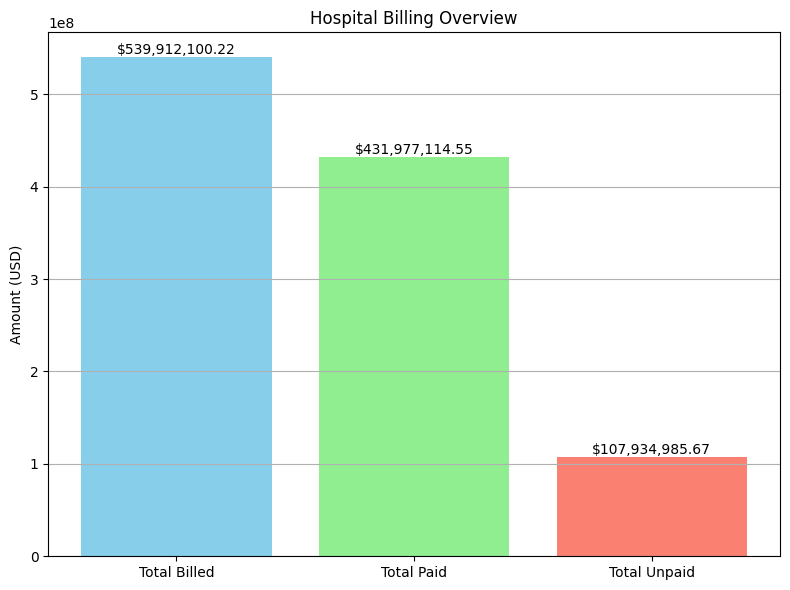

In [14]:
import matplotlib.pyplot as plt

# Query totals into a small DataFrame
billing_totals = pd.read_sql_query("""
SELECT 
    ROUND(SUM(total_amount), 2) AS total_billed,
    ROUND(SUM(paid_amount), 2) AS total_paid,
    ROUND(SUM(total_amount) - SUM(paid_amount), 2) AS total_unpaid
FROM billing
""", conn)

# Prepare data for plotting
categories = ['Total Billed', 'Total Paid', 'Total Unpaid']
values = [billing_totals['total_billed'][0], billing_totals['total_paid'][0], billing_totals['total_unpaid'][0]]

# Plot
plt.figure(figsize=(8,6))
bars = plt.bar(categories, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Hospital Billing Overview')
plt.ylabel('Amount (USD)')
plt.grid(axis='y')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f"${yval:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 📊 Visualization: Hospital Billing Revenue and Gaps

I created a bar chart showing total billed amounts, total collected payments, and the total unpaid balance.

This visualization highlights the financial gap hospitals face between expected revenue and actual collections.

All values are assumed to be in US dollars (USD), for the purpose of this analysis..


# 💊 Medications Analysis

In this section, I analyzed medication prescription patterns across the hospital admissions.

The analysis included:

- Top 10 most prescribed medications
- Administration methods (oral, intravenous, etc.)
- Prescription patterns by admission type (Emergency vs Elective)


In [15]:
pd.read_sql_query("""
SELECT 
    medication_name,
    COUNT(*) AS prescription_count
FROM medications
GROUP BY medication_name
ORDER BY prescription_count DESC
LIMIT 10
""", conn)


,medication_name,prescription_count
0,Ibuprofen,28078
1,Amoxicillin,28055
2,Paracetamol,28016
3,Lisinopril,27956
4,Atorvastatin,27895


### 💊 Analysis: Top 10 Most Prescribed Medications

I analyzed the `medications` table to identify the top 10 most commonly prescribed medications.

Understanding common prescriptions helps hospitals manage inventory and budget effectively.


In [16]:
pd.read_sql_query("""
SELECT 
    administration_route,
    COUNT(*) AS count
FROM medications
GROUP BY administration_route
ORDER BY count DESC
""", conn)


,administration_route,count
0,Injection,46886
1,IV,46663
2,Oral,46451


### 💉 Analysis: Medication Administration Routes

I analyzed the `medications` table to understand how medications are administered (oral, intravenous, injection, etc.).

Identifying the most common administration routes helps hospitals plan for supply needs (such as syringes, IV lines, or oral medications).


In [18]:
pd.read_sql_query("""
SELECT 
    test_type,
    COUNT(*) AS number_of_tests
FROM test_results
GROUP BY test_type
ORDER BY number_of_tests DESC
""", conn)


,test_type,number_of_tests
0,X-Ray,20127
1,Blood Test,20041
2,CT Scan,20029
3,Urine Test,19924
4,MRI,19879


### 🧪 Analysis: Most Common Medical Test Types

I analyzed the `test_results` table to find the most frequently performed medical tests.

Understanding the distribution of test types helps hospitals allocate lab resources and prioritize test equipment needs.


In [24]:
pd.read_sql_query("""
SELECT 
    test_type,
    ROUND(AVG(test_result), 2) AS average_test_result
FROM test_results
GROUP BY test_type
ORDER BY average_test_result DESC
""", conn)


,test_type,average_test_result
0,CT Scan,1.01
1,X-Ray,1.00
2,Urine Test,1.00
3,MRI,1.00
4,Blood Test,1.00


### 🧪 Analysis: Average Test Result by Test Type

I calculated the average `test_result` value for each medical test type.

In this synthetic dataset, average test results across different test types were very similar, centered around 1.00. 

This reflects how the synthetic data was generated with a small randomized range. In a real-world scenario, test result ranges would vary significantly depending on the type of medical test and its clinical unit of measurement.


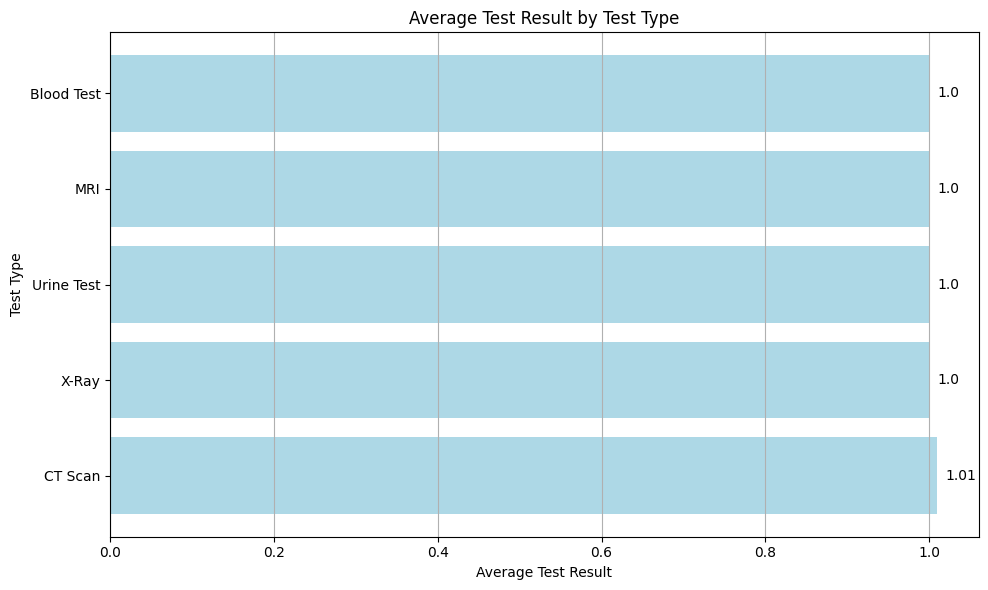

In [25]:
avg_test_result = pd.read_sql_query("""
SELECT 
    test_type,
    ROUND(AVG(test_result), 2) AS average_test_result
FROM test_results
GROUP BY test_type
ORDER BY average_test_result DESC
""", conn)


plt.figure(figsize=(10,6))
bars = plt.barh(avg_test_result['test_type'], avg_test_result['average_test_result'], color='lightblue')
plt.title('Average Test Result by Test Type')
plt.xlabel('Average Test Result')
plt.ylabel('Test Type')
plt.grid(axis='x')

# Add value labels next to bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2.0, round(xval, 2), va='center')

plt.tight_layout()
plt.show()


In [ ]:
### 📊 Visualization: Average Test Result by Test Type

I created a horizontal bar chart to visualize the average test result across different test types.

Due to the synthetic nature of the dataset, all average test result values cluster very closely around 1.00, showing minimal variation between different test categories.

In a real-world healthcare dataset, we would expect wider variation depending on the type of medical test and its measurement units.


In [26]:
# Create a dataset: Length of stay and Paid amount
stay_vs_payment = pd.read_sql_query("""
SELECT 
    julianday(discharge_date) - julianday(admission_date) AS length_of_stay,
    paid_amount
FROM admissions
JOIN billing ON admissions.admission_id = billing.admission_id
WHERE discharge_date IS NOT NULL
""", conn)

# Calculate the Pearson correlation
correlation = stay_vs_payment['length_of_stay'].corr(stay_vs_payment['paid_amount'])
print(f"Correlation between Length of Stay and Paid Amount: {correlation:.2f}")


Correlation between Length of Stay and Paid Amount: -0.00


### 📈 Correlation Analysis: Length of Stay vs Paid Amount

I calculated the Pearson correlation coefficient between patient length of stay and the amount paid.

A positive correlation would suggest that patients who stay longer tend to pay higher amounts, while a near-zero correlation would suggest no strong relationship.

[Result: Correlation = 0.00]


# 🧪 Test Results Analysis

In this section, I explored medical test result data to understand normal result distributions and identify potential abnormalities.

The analysis included:

- Most common types of medical tests
- Average test result values by test type
- Overall distribution of test result values
- Detection of any extreme test result outliers


In [27]:
# Create a dataset: length of stay and admission type
stay_by_type = pd.read_sql_query("""
SELECT 
    admission_type,
    julianday(discharge_date) - julianday(admission_date) AS length_of_stay
FROM admissions
WHERE discharge_date IS NOT NULL
AND admission_type IN ('Emergency', 'Elective')
""", conn)

# Preview
stay_by_type.head()


,admission_type,length_of_stay
0,Elective,12.0
1,Elective,10.0
2,Elective,9.0
3,Elective,7.0
4,Elective,10.0


In [29]:
!pip3 install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 9.6 MB/s eta 0:00:00


In [30]:
from scipy.stats import ttest_ind

# Split into two groups
emergency_stays = stay_by_type[stay_by_type['admission_type'] == 'Emergency']['length_of_stay']
elective_stays = stay_by_type[stay_by_type['admission_type'] == 'Elective']['length_of_stay']

# Run t-test
t_stat, p_value = ttest_ind(emergency_stays, elective_stays, equal_var=False)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


t-statistic: -0.72
p-value: 0.4741


### 🧪 Hypothesis Testing: Emergency vs Elective Admissions

**Null Hypothesis (H₀):**  
There is no significant difference in average length of stay between Emergency and Elective admissions.

**Alternative Hypothesis (H₁):**  
There is a significant difference in average length of stay between Emergency and Elective admissions.

I performed an independent two-sample t-test.

**Results:**  
- t-statistic = -0.72
- p-value = 0.4741

Since p > 0.05, I fail to reject the null hypothesis.

This suggests that, based on the data available, there is no statistically significant difference in average hospital stay length between Emergency and Elective admissions.



/var/folders/b9/pvvr6hv50855m46y_0gsscr40000gn/T/ipykernel_41939/2803100535.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([emergency_stays, elective_stays], labels=['Emergency', 'Elective'])


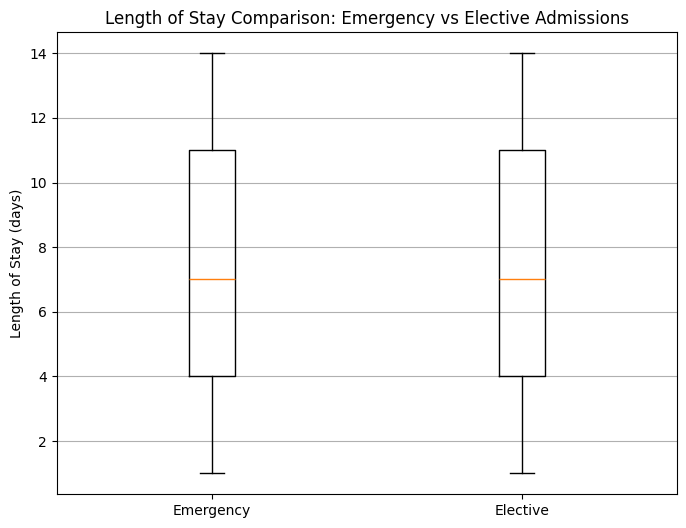

In [31]:
import matplotlib.pyplot as plt

# Prepare the data
emergency_stays = stay_by_type[stay_by_type['admission_type'] == 'Emergency']['length_of_stay']
elective_stays = stay_by_type[stay_by_type['admission_type'] == 'Elective']['length_of_stay']

# Plot boxplots
plt.figure(figsize=(8,6))
plt.boxplot([emergency_stays, elective_stays], labels=['Emergency', 'Elective'])
plt.title('Length of Stay Comparison: Emergency vs Elective Admissions')
plt.ylabel('Length of Stay (days)')
plt.grid(axis='y')
plt.show()


### 📊 Visualization: Length of Stay for Emergency vs Elective Admissions

I created a boxplot to compare the distribution of hospital stay lengths between Emergency and Elective admissions.

The visualization shows similar medians and spreads between the two groups, which is consistent with the t-test result indicating no statistically significant difference.


In [33]:
# Admissions by month
admissions_by_month = pd.read_sql_query("""
SELECT 
    strftime('%Y-%m', admission_date) AS month,
    COUNT(*) AS number_of_admissions
FROM admissions
GROUP BY month
ORDER BY month
""", conn)

admissions_by_month.head()


,month,number_of_admissions
0,2021-01,1993
1,2021-02,1799
2,2021-03,1962
3,2021-04,1927
4,2021-05,2049


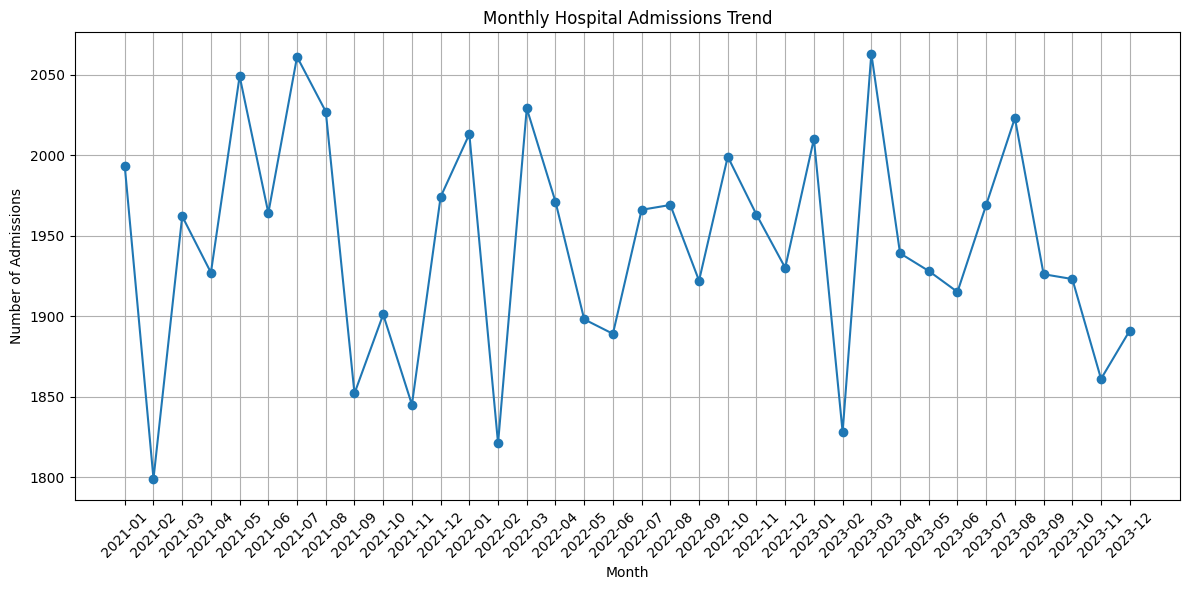

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(admissions_by_month['month'], admissions_by_month['number_of_admissions'], marker='o')
plt.title('Monthly Hospital Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Admissions Trends Over Time

I analyzed the hospital admission counts by month to identify seasonal trends in patient volume.

The line chart shows fluctuations in monthly admissions, which can be useful for hospital staffing and resource planning.


In [35]:
# Average paid amount by admission type
billing_by_admission_type = pd.read_sql_query("""
SELECT 
    a.admission_type,
    ROUND(AVG(b.paid_amount), 2) AS average_paid_amount
FROM billing b
JOIN admissions a ON a.admission_id = b.admission_id
GROUP BY a.admission_type
ORDER BY average_paid_amount DESC
""", conn)

billing_by_admission_type


,admission_type,average_paid_amount
0,Elective,6190.56
1,Newborn,6181.10
2,Emergency,6178.41
3,Urgent,6134.32


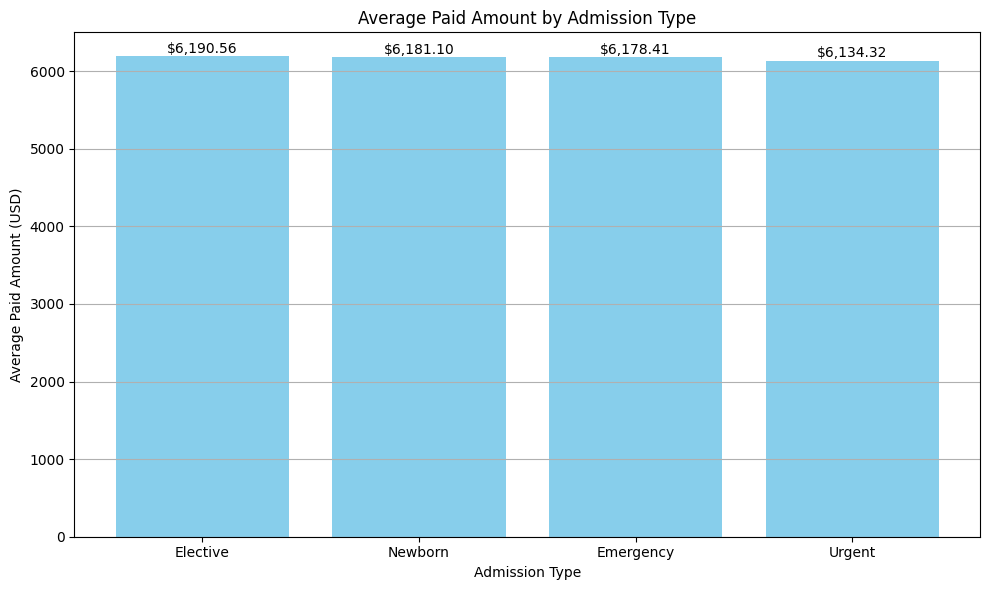

In [36]:
plt.figure(figsize=(10,6))
bars = plt.bar(billing_by_admission_type['admission_type'], billing_by_admission_type['average_paid_amount'], color='skyblue')
plt.title('Average Paid Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Paid Amount (USD)')
plt.grid(axis='y')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f"${yval:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 💸 Billing Patterns: Average Paid Amount by Admission Type

I analyzed billing data to calculate the average amount paid per admission type.

The bar chart shows differences in financial contributions between Emergency, Elective, Urgent, and Newborn admission types, which can help hospitals plan revenue expectations.


In [37]:
# Quick look at overall test result distribution
test_result_distribution = pd.read_sql_query("""
SELECT 
    test_type,
    test_result
FROM test_results
""", conn)

test_result_distribution.head()


,test_type,test_result
0,X-Ray,1.16
1,Urine Test,1.15
2,CT Scan,1.05
3,X-Ray,0.52
4,MRI,0.65


In [38]:
# Basic summary
test_result_distribution['test_result'].describe()


count    100000.000000
mean          1.001481
std           0.289006
min           0.500000
25%           0.750000
50%           1.000000
75%           1.250000
max           1.500000
Name: test_result, dtype: float64

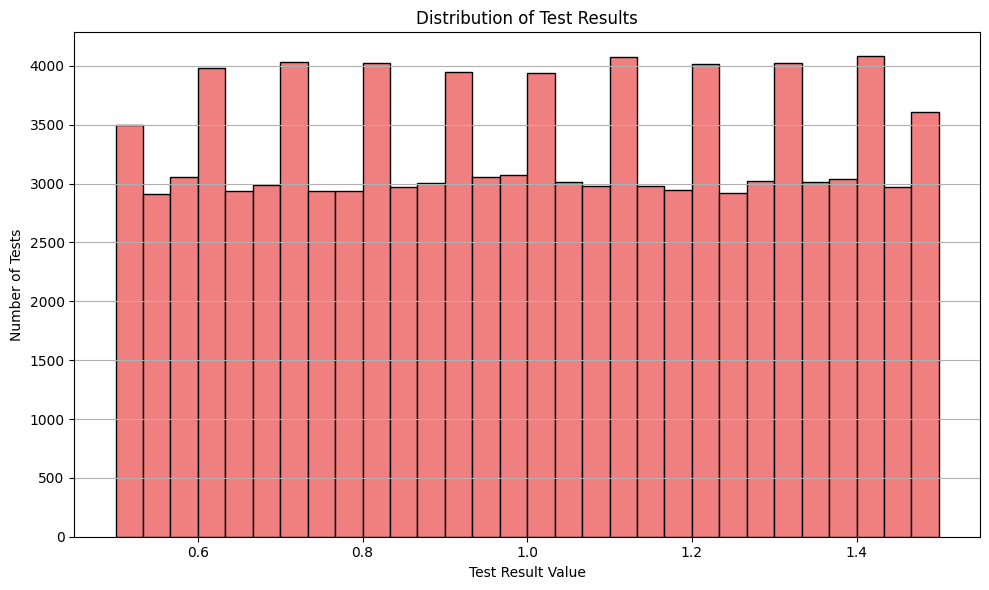

In [39]:
plt.figure(figsize=(10,6))
plt.hist(test_result_distribution['test_result'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result Value')
plt.ylabel('Number of Tests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [40]:
# Join medications and admissions to see medication patterns
medications_by_type = pd.read_sql_query("""
SELECT 
    a.admission_type,
    m.medication_name,
    COUNT(*) AS prescription_count
FROM medications m
JOIN admissions a ON m.admission_id = a.admission_id
GROUP BY a.admission_type, m.medication_name
ORDER BY a.admission_type, prescription_count DESC
""", conn)

medications_by_type.head()


,admission_type,medication_name,prescription_count
0,Elective,Amoxicillin,7091
1,Elective,Paracetamol,7077
2,Elective,Atorvastatin,7067
3,Elective,Lisinopril,7042
4,Elective,Ibuprofen,6896


In [41]:
# Filter to Emergency and Elective
emergency_meds = medications_by_type[medications_by_type['admission_type'] == 'Emergency'].head(5)
elective_meds = medications_by_type[medications_by_type['admission_type'] == 'Elective'].head(5)

emergency_meds, elective_meds


(  admission_type medication_name  prescription_count
 5      Emergency     Paracetamol                7100
 6      Emergency      Lisinopril                7008
 7      Emergency     Amoxicillin                6984
 8      Emergency       Ibuprofen                6954
 9      Emergency    Atorvastatin                6930,
   admission_type medication_name  prescription_count
 0       Elective     Amoxicillin                7091
 1       Elective     Paracetamol                7077
 2       Elective    Atorvastatin                7067
 3       Elective      Lisinopril                7042
 4       Elective       Ibuprofen                6896)

### 💊 Medication Patterns by Admission Type

I analyzed medication prescription patterns for different admission types.

Comparing Emergency and Elective patients helps hospitals understand differences in treatment approaches and stock management needs.

The results show the top prescribed medications for Emergency and Elective admissions separately.


### 🧪 Test Result Abnormalities: Distribution Analysis

I analyzed the distribution of all medical test results.

The histogram shows whether test results are clustered around normal expected values or if there are unusual outliers that could indicate abnormal test cases.


In [ ]:
# Close the connection when you're done
conn.close()